# Permutation test for correlation

In the previous examples we used permutation testing to assess the significance of a difference between groups (difference of means or mean difference).

Permutation testing can also be used to assess the statistical significance of a <i>correlation</i>.

As a reminder, a correlation can occur <i>only</i> in paired designs, as when two variables are correlated, it means that an individual's score on one variable is related to their score on the other variable. 

Correlations can be interesting in themselves (do students who score highly on English tests also score highly on maths tests?; do people who eat more broccli have greater bone density?). 

They can also reflect the fact that experimental measures often depend on factors other than the one we are manipulating (sometimes called <i>confounding factors</i>), which are what we try to control for by using a paired design. For example if we are interested in whether men earn more than women, we might use a paired design comparing brothers and sisters to take into account the very important effects of parental occupation and education on earnings which mean that high-earning brothers often have high-earning sisters. The fact that brothers' and sisters' earnings are correlated actually reflects the confounds that we want to 'cancel out' by using a paired design to test gender differences.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

## Toy example

[A toy example is an example with a very small dataset, just to show how it works]

We are interested in whether people who eat more broccoli have higher IQs.

The following made-up data give weekly broccoli consumption in grams and IQ for 25 individuals:

In [2]:
broccoli = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/broccoli.csv')
broccoli

,broccoli_g,IQ
0,0,87
1,28,91
2,0,101
3,20,92
4,0,96
5,92,95
6,88,92
7,128,94
8,0,96
9,22,99


Let's plot the data:

<Axes: xlabel='broccoli_g', ylabel='IQ'>

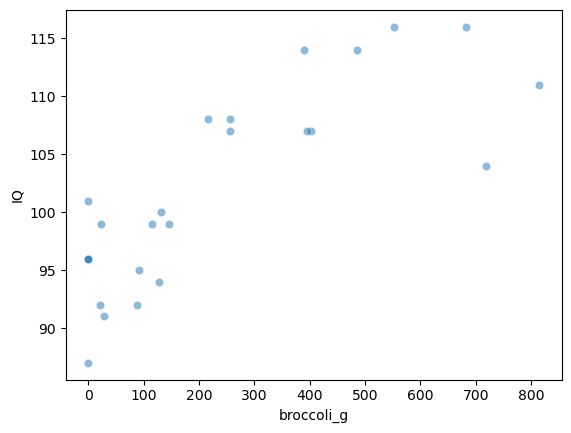

In [3]:
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ', alpha=0.5)

We can see that there does seem to be a correlation. Let's calculate Pearson's $r$

In [4]:
broccoli.corr()

,broccoli_g,IQ
broccoli_g,1.000000,0.801153
IQ,0.801153,1.000000


The correlation is 0.80, which is actually very strong (remember they are made-up data!).

### Is this result statistically significant? 

That is, would the result (a correlation of 0.80) be very unlikely to occur due to chance, if the null hypothesis were true? 

To answer this question, we need to think about what the null hypothesis <i>is</i>. 

The correlation tests for a relationship between broccoli consumption and IQ. The null hypothesis is that there is no such relationship. 

Even if there was no relationship between broccoli consumption and IQ, it would sometimes happen that for 25 random people the ones with the highest IQ tend to also be the biggest broccoli-eaters, resulting in a positive correlation. The question is how often a positive correlation as large as $r$=0.80 would occur just due to chance. This will depend on the distriubtion in both broccoli consumption and IQ.


### Obtaining the null distribution by permutation testing

The sample tells us several interesting things about the parent distribution, regardless of whether broccoli consummption and IQ are related:

<ul>
    <li> Most people eat between 0 and 500g of broccoli a week
    <li> Quite a few people eat 0g of broccoli (they never eat broccoli, basically)
</ul>

It also tells us about some potential effects to do with the relationship between IQ and broccoli:
<ul>
    <li> the quantity of broccoli eaten seems to be higher for individuals with higher IQ
    <li> none of the highest IQ people are the 0g of broccoli people
</ul>

What we are going to do is shuffle the data around to create many new (re)samples preserving distribution within each variable (broccoli consumption and IQ - so for example there will always be 5 non-broccoli-eaters) but pairing the datapoints at random so one person's IQ is matched with another person's broccoli consumption. 

Using these simulated (shuffled) datasets we will work out how often we get a correlation of 0.80 or more. This is equivalent to determining how likely our correlation is to have occurred due to chance.



### Run the simulation

To generate new simulated datasets, we will shuffle around the datapoints in our original dataset. 

Which ones can we shuffle?

To generate each new simulated dataset, we will randomly shuffle the values for broccoli consumption, whilst leaving the IQs in place, to get a random re-pairing of the data

Here is one such shuffle, try running it a few times and watching how the resulting dataframe changes

In [5]:
broccoli_shuffled = broccoli.copy()
broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli.broccoli_g) # replace the column 'broccoli_g' with a random permutation of itself
broccoli_shuffled

,broccoli_g,IQ
0,815,87
1,402,91
2,88,101
3,216,92
4,395,96
5,682,95
6,128,92
7,390,94
8,146,96
9,28,99


Let's get the correlation in the shuffled dataset:

In [6]:
np.corrcoef(broccoli_shuffled.broccoli_g, broccoli_shuffled.IQ)

array([[ 1.        , -0.12261632],
       [-0.12261632,  1.        ]])

### Visualizing randoms shuffles in the broccoli data

It's not really obvious what has happened from looking at the dataframe, but let's try plotting some shuffled data below

Below I generate 4 random shuffles of broccoli data, and plot the outcomes:

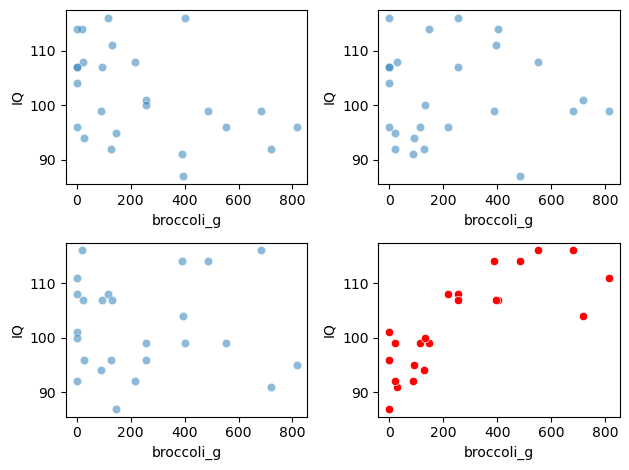

In [7]:
for n in range(3):
    broccoli_shuffled = broccoli.copy()  # work on a copy of the original dataframe
    broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli_shuffled['broccoli_g']) # replace the column 'Pet' with a random permutation of itself

    plt.subplot(2,2,n+1)
    sns.scatterplot(data=broccoli_shuffled, x='broccoli_g', y='IQ', alpha=0.5)

# plot the original data in red
plt.subplot(2,2,4)
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ', color='r')
plt.tight_layout()

You can see that the relationship bbetween broccoli consumption and IQ looks less tight in the shuffled (blue) datasets.



### Plot the null distribution for a large number of shuffles

Now we can repeat the process for a large number of shuffles and get the correlation (Spearman's $r$) for each shuffle. The distribution of these correlations is the null distribution to which our observed difference ($r$=0.80) is to be compared.


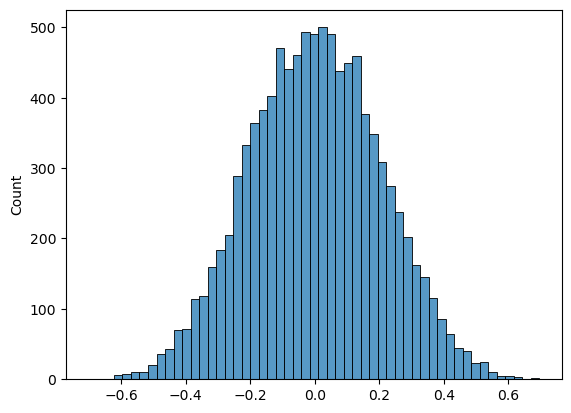

proportion >0.80 = 0.0%


In [8]:
nReps = 10000 # (number of shuffles)
c = np.empty(nReps) # array to store mean difference for each shuffle

for i in range(nReps):
    broccoli_shuffled = broccoli.copy()  # work on a copy of the original dataframe
    broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli['broccoli_g']) # replace the column 'Pet' with a random permutation of itself
    tmp = np.corrcoef(broccoli_shuffled.broccoli_g, broccoli.IQ)
    c[i] = tmp[0][1]
    
sns.histplot(c)
plt.show()

print('proportion >0.80 = ' + str(100*np.mean(c>0.80)) + '%')

### The $𝑝$-value¶

The probability that the test statistic (in this case, the correlation bbetween broccoli consumption and IQ) would be observed if the null hypothesis were true, is sometimes called the $𝑝$-value.

Our permutation test shows that the $𝑝$-value associated with the observed difference of means is basically zero- we never get a correlation of 0.80 in our 10,000 random shuffles.

The result is considered statistically significant if $𝑝$ is smaller than some predetermined level, known as $\alpha$. Usually $\alpha=0.05$ or $\alpha=0.05$ is used, so the result is significant if $p=0.05$ or $p=0.01$. Our result would be considered highly statistically significant.

## Use a built in function

Now you have seen how the permutation test works, we can learn how to run it more easily using the built in function <tt>scipy.stats.permutation_test</tt>

### Syntax of <tt>stats.permutation_test</tt>

As previously, we need to define a function that gets our test statsitic. 

The <tt>numpy</tt> function <tt>df.corr()</tt> does part of the job, but it returns a 2-2 correlation matrix. To get the correlation we need, we then have to pick out the element in row 0 and column 1:

In [9]:
def correlate(x, y):
    tmp = np.corrcoef(x,y)
    c = tmp[0][1] 
    return c

Thereafter we have to run <tt>stats.permutation_test</tt>, but using the option `permutation_type='pairings'`, which shuffles the data in such a way as to keep all the broccoli values in the broccoi column, but re-pair them with different people's IQs in each shuffle.

## Recap

To run a permutation test on a correlation, we shuffled up all the pairings so each person's IQ was paired with someone else's broccoli consumption. We did not switch any datapoints from the broccoli column into the the IQ column (!).

For each shuffle we calculated the correlation between broccoli consumption and IQ

Permutation testing in this way gives us a null distribution for the correlation. Values of the correlation coefficient that occur rarely in the null distriubtion are considered statistically significant.
    
To run the permutation test with <tt>scipy.stats</tt> we need the option `permutation_type='pairings'`